In [18]:
import optuna
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Importar o conjunto de dados Iris conforme Instruído

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data         # Atributos das flores
y = iris.target       # Classes reais (usadas apenas para avaliação)

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

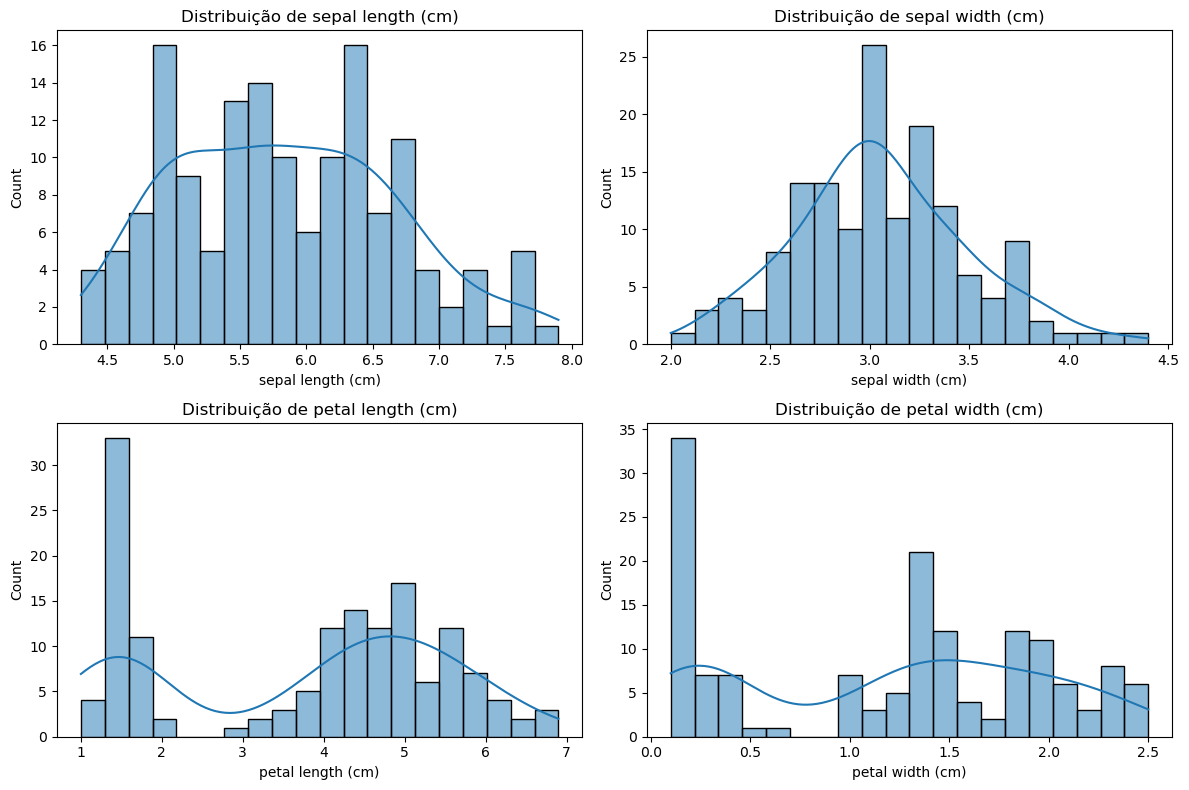

In [9]:
plt.figure(figsize=(12,8))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2,2, i+1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribuição de {column}')
plt.tight_layout()
plt.show()

    

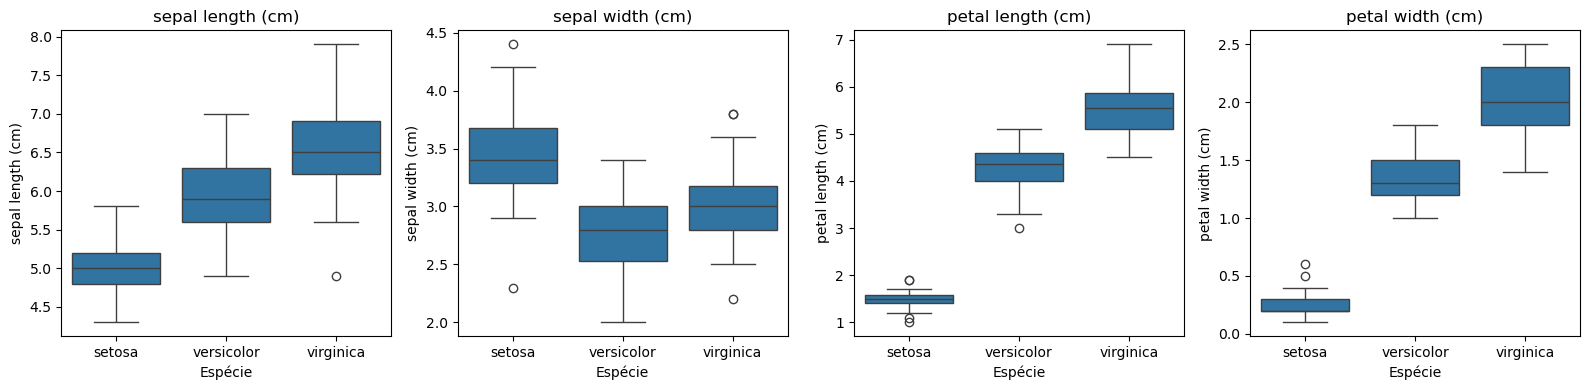

In [ ]:
plt.figure(figsize=(16,4))
features = iris.feature_names

for i, feature in enumerate(features):
    plt.subplot(1,4, i +1)
    sns.boxplot(x='target_name', y=feature, data=df)
    plt.title(feature)
    plt.xlabel("Espécie")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

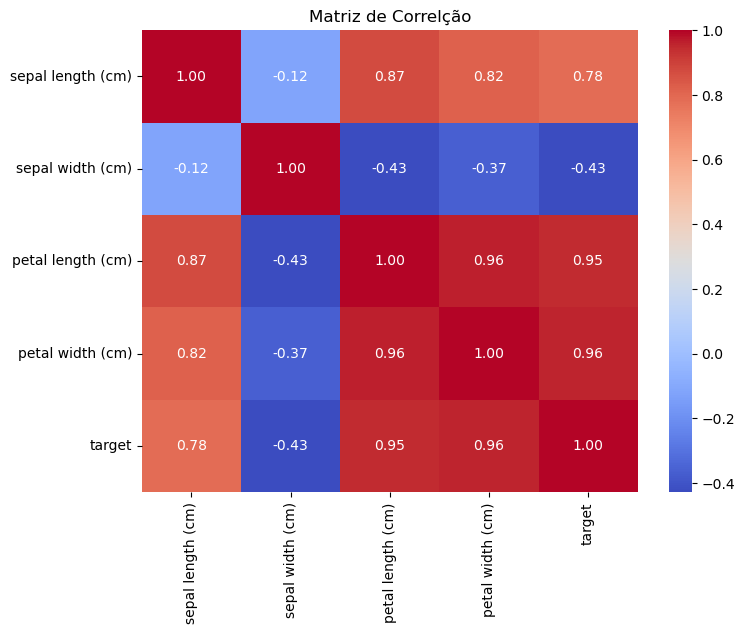

In [12]:
plt.figure(figsize=(8,6))
correlation_matrix = df[iris.feature_names + ['target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlção")
plt.show()

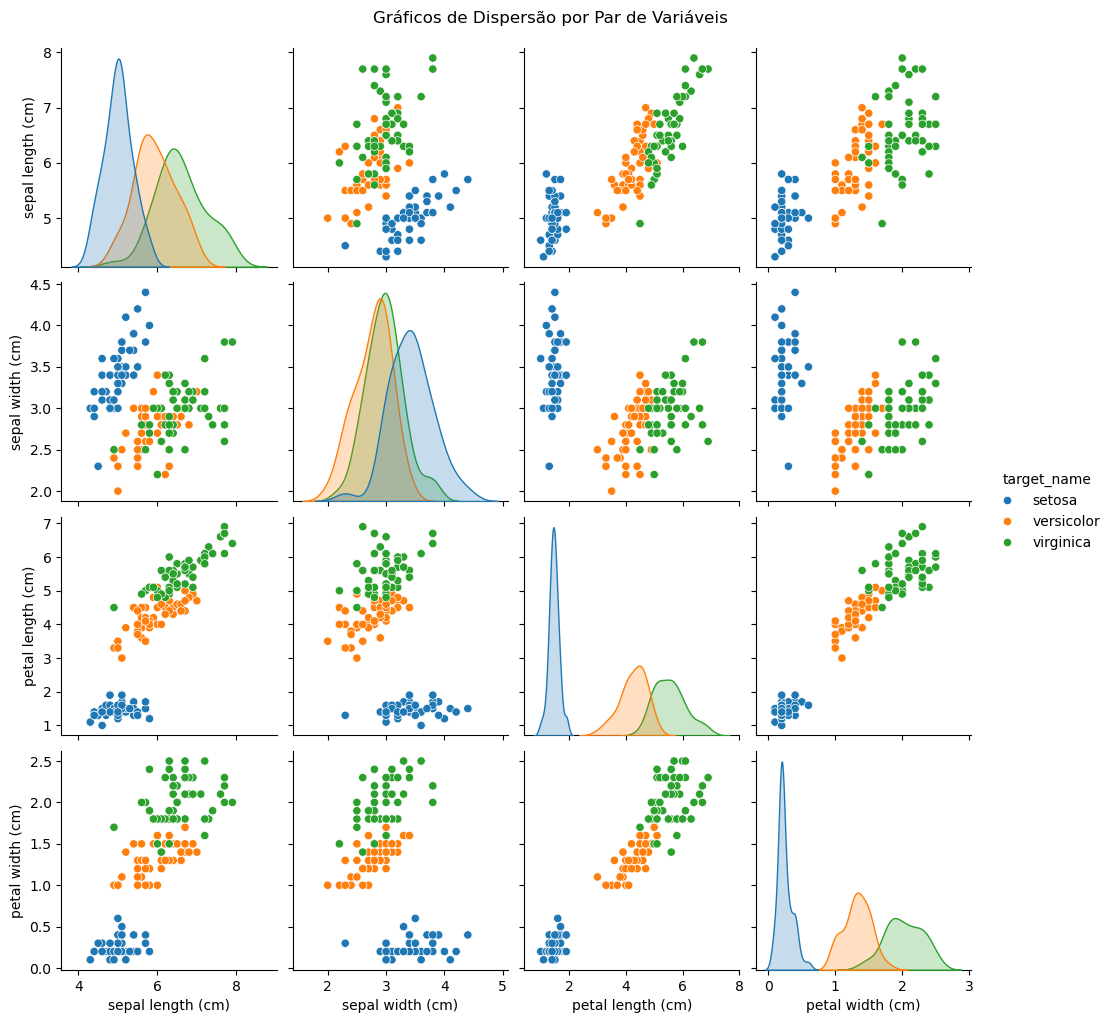

In [15]:
sns.pairplot(df[iris.feature_names + ['target_name']], hue="target_name", diag_kind="kde",height=2.5)
plt.suptitle("Gráficos de Dispersão por Par de Variáveis", y=1.02)
plt.show()

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## K-Means

In [17]:
X = df.drop(columns=['target','target_name'])
y = df['target']

In [21]:
def kmens_objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 3, 10)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=51)
    y_predict = kmeans.fit_predict(X)
    
    ari = adjusted_rand_score(y,y_predict)
    return ari

In [22]:
search_space = {
    'n_clusters': list(range(3,11))
}

sampler = optuna.samplers.GridSampler(search_space=search_space)
estudo_kmeans = optuna.create_study(direction="maximize",sampler=sampler)
estudo_kmeans.optimize(kmens_objective,n_trials=100)

[I 2025-12-21 15:48:35,567] A new study created in memory with name: no-name-75f37786-7cc0-4e3e-93a5-a7a4776d7770
[I 2025-12-21 15:48:35,613] Trial 0 finished with value: 0.4237624913977765 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.4237624913977765.
[I 2025-12-21 15:48:35,616] Trial 1 finished with value: 0.6807940871924876 and parameters: {'n_clusters': 5}. Best is trial 1 with value: 0.6807940871924876.
[I 2025-12-21 15:48:35,619] Trial 2 finished with value: 0.6162452219303186 and parameters: {'n_clusters': 4}. Best is trial 1 with value: 0.6807940871924876.
[I 2025-12-21 15:48:35,621] Trial 3 finished with value: 0.4197233759008397 and parameters: {'n_clusters': 10}. Best is trial 1 with value: 0.6807940871924876.
[I 2025-12-21 15:48:35,623] Trial 4 finished with value: 0.6708126818936865 and parameters: {'n_clusters': 6}. Best is trial 1 with value: 0.6807940871924876.
[I 2025-12-21 15:48:35,626] Trial 5 finished with value: 0.7302382722834697 and parameters

In [24]:
print("Melhores resultados:")
print(estudo_kmeans.best_params)

n_cluster = estudo_kmeans.best_params['n_clusters']
best_kmeans = KMeans(n_clusters=n_cluster, random_state=51)
y_best_kmeans = best_kmeans.fit_predict(X)

best_ari = adjusted_rand_score(y,y_best_kmeans)
print(f'Melhor adjust rand Index : {best_ari:.4f} com total de clusters {n_cluster}')

Melhores resultados:
{'n_clusters': 3}
Melhor adjust rand Index : 0.7302 com total de clusters 3


In [26]:
y_best_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [27]:
best_kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

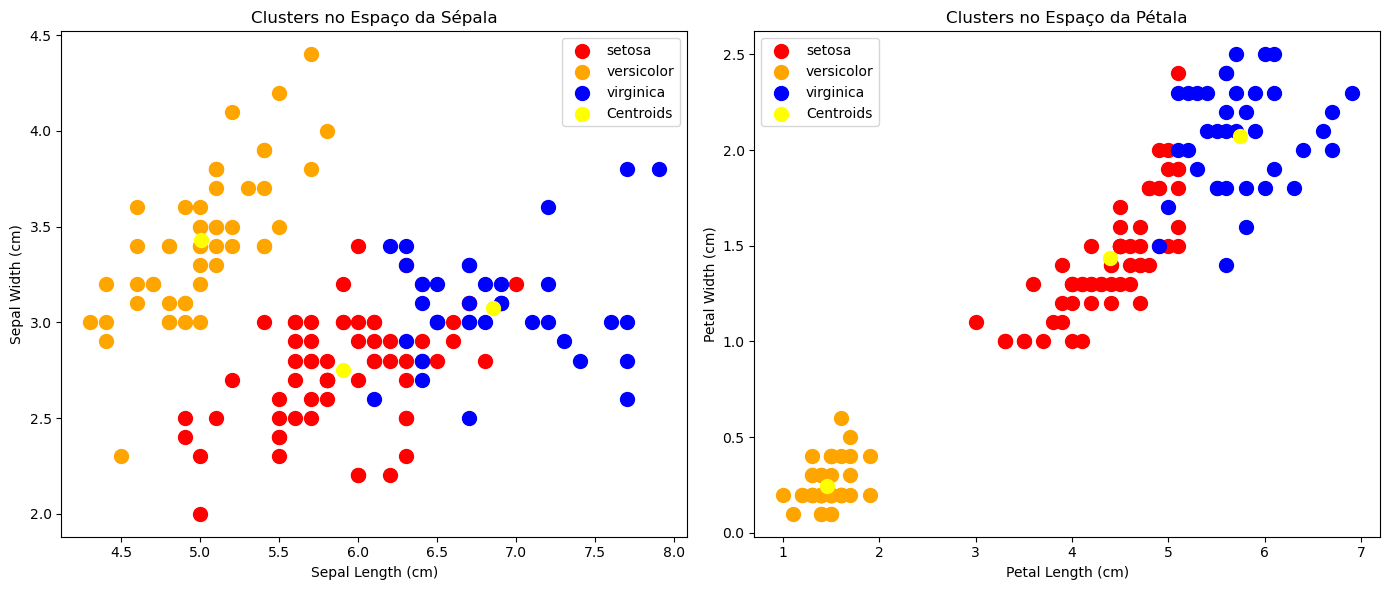

In [28]:
x = X.values

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(x[y_best_kmeans == 0, 0], x[y_best_kmeans == 0, 1], s=100, c='red', label=iris.target_names[0])
axes[0].scatter(x[y_best_kmeans == 1, 0], x[y_best_kmeans == 1, 1], s=100, c='orange', label=iris.target_names[1])
axes[0].scatter(x[y_best_kmeans == 2, 0], x[y_best_kmeans == 2, 1], s=100, c='blue', label=iris.target_names[2])
axes[0].scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
axes[0].set_xlabel("Sepal Length (cm)")
axes[0].set_ylabel("Sepal Width (cm)")
axes[0].set_title("Clusters no Espaço da Sépala")
axes[0].legend()

axes[1].scatter(x[y_best_kmeans == 0, 2], x[y_best_kmeans == 0, 3], s=100, c='red', label=iris.target_names[0])
axes[1].scatter(x[y_best_kmeans == 1, 2], x[y_best_kmeans == 1, 3], s=100, c='orange', label=iris.target_names[1])
axes[1].scatter(x[y_best_kmeans == 2, 2], x[y_best_kmeans == 2, 3], s=100, c='blue', label=iris.target_names[2])
axes[1].scatter(best_kmeans.cluster_centers_[:, 2], best_kmeans.cluster_centers_[:, 3], s=100, c='yellow', label='Centroids')
axes[1].set_xlabel("Petal Length (cm)")
axes[1].set_ylabel("Petal Width (cm)")
axes[1].set_title("Clusters no Espaço da Pétala")
axes[1].legend()

plt.tight_layout()
plt.show()

In [29]:
df2 = df[["petal length (cm)", "petal width (cm)", "target"]] 
X2 = df2.drop(columns=['target'])
y2 = df2['target']

In [30]:
df2.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [31]:
def kmens_objective2(trial):
    n_clusters = trial.suggest_int('n_clusters', 3, 10)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=51)
    y_predict = kmeans.fit_predict(X2)
    
    ari = adjusted_rand_score(y2, y_predict)
    return ari

In [32]:
search_space_2 = {'n_clusters': list(range(3,10))}

sampler2 = optuna.samplers.GridSampler(search_space=search_space_2)
estudo_kmeans_2 = optuna.create_study(direction='maximize', sampler=sampler2)

estudo_kmeans_2.optimize(kmens_objective2,n_trials=100)

[I 2025-12-21 16:18:53,522] A new study created in memory with name: no-name-6c9459d0-fa82-4533-9b05-7ae29888407b
[I 2025-12-21 16:18:53,526] Trial 0 finished with value: 0.41979704984004285 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.41979704984004285.
[I 2025-12-21 16:18:53,528] Trial 1 finished with value: 0.6843285999114527 and parameters: {'n_clusters': 5}. Best is trial 1 with value: 0.6843285999114527.
[I 2025-12-21 16:18:53,531] Trial 2 finished with value: 0.7120072664344966 and parameters: {'n_clusters': 4}. Best is trial 2 with value: 0.7120072664344966.
[I 2025-12-21 16:18:53,534] Trial 3 finished with value: 0.6400333142407856 and parameters: {'n_clusters': 6}. Best is trial 2 with value: 0.7120072664344966.
[I 2025-12-21 16:18:53,536] Trial 4 finished with value: 0.8856970310281228 and parameters: {'n_clusters': 3}. Best is trial 4 with value: 0.8856970310281228.
[I 2025-12-21 16:18:53,539] Trial 5 finished with value: 0.573853676538426 and parameters

In [33]:
estudo_kmeans_2.best_params

{'n_clusters': 3}

In [35]:
print("Melhores parâmetros encontrados:")

best_params_2 = estudo_kmeans_2.best_params
n_cluster_2 = best_params_2['n_clusters']

melhor_kmeans_2 = KMeans(n_clusters=n_cluster_2, random_state=51)

y_best_kmeans_2 = melhor_kmeans_2.fit_predict(X2)

best_ari2 = adjusted_rand_score(y2, y_best_kmeans_2)

print(f'Melhor Adjust Rand Index: {best_ari2:.4f} com total de clusters: {n_cluster_2}')

Melhores parâmetros encontrados:
Melhor Adjust Rand Index: 0.8857 com total de clusters: 3


In [37]:
print(f"Melhor Adjust Rand Index 1: {best_ari:.4f} com total de clusters '{n_cluster}'")
print(f"Melhor Adjust Rand Index 2: {best_ari2:.4f} com total de clusters '{n_cluster_2}'")

Melhor Adjust Rand Index 1: 0.7302 com total de clusters '3'
Melhor Adjust Rand Index 2: 0.8857 com total de clusters '3'


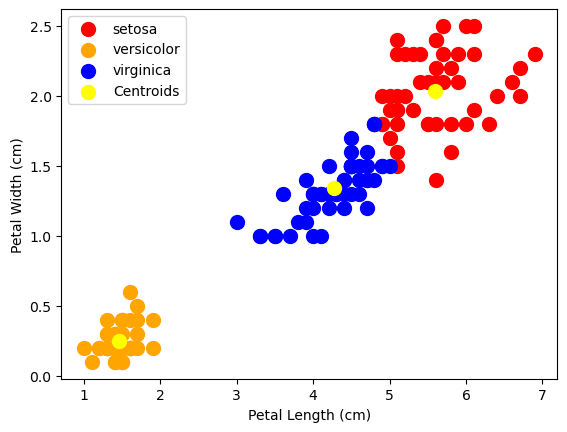

In [39]:
x = df2.iloc[:, [0, 1, 2]].values
plt.scatter(x[y_best_kmeans_2 == 0, 0], x[y_best_kmeans_2 == 0, 1], 
            s = 100, c = 'red', label=iris.target_names[0])
plt.scatter(x[y_best_kmeans_2 == 1, 0], x[y_best_kmeans_2 == 1, 1], 
            s = 100, c = 'orange', label=iris.target_names[1])
plt.scatter(x[y_best_kmeans_2 == 2, 0], x[y_best_kmeans_2 == 2, 1],
            s = 100, c = 'blue', label=iris.target_names[2])


plt.scatter(melhor_kmeans_2.cluster_centers_[:, 0], melhor_kmeans_2.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()